# Stacking Classifier Models with Scikit-learn.

In this notebook, we'll explore Stacking classifier model in Scikit-learn. Stacking Classifier is an ensemble machine learning method.

The main idea is to combine different machine learning algorithms together in a single model training. There are a number of ways to do this, but in this motebook, we'll explore the most commom method which is stacking a number of machine learning algorithms and passing their final output as an input to another , usually simple algorithm. We can use this stacking method for both regression and classification use cases. They are both implemented in Scikit-learn using the StackingClassifier module in sklearn.ensemble model.

### Import libraries

In [1]:
import pandas as pd 
import numpy as np 
from numpy import mean
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(sklearn.__version__)

1.2.2


### Import data

We'll use a dataset for classifying glass type which can be downloaded from kaggle here. https://www.kaggle.com/datasets/uciml/glass

In [3]:
data = pd.read_csv('glass.csv')

### Data exploration

The data points are in integers, but from the target column, we know that his is a classification problem. We need to build a model that can classify glass into different types.

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Check the number of glass types in the target column.

In [5]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Get general information about the dataset. There are no null values in the data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Visualizing the data

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

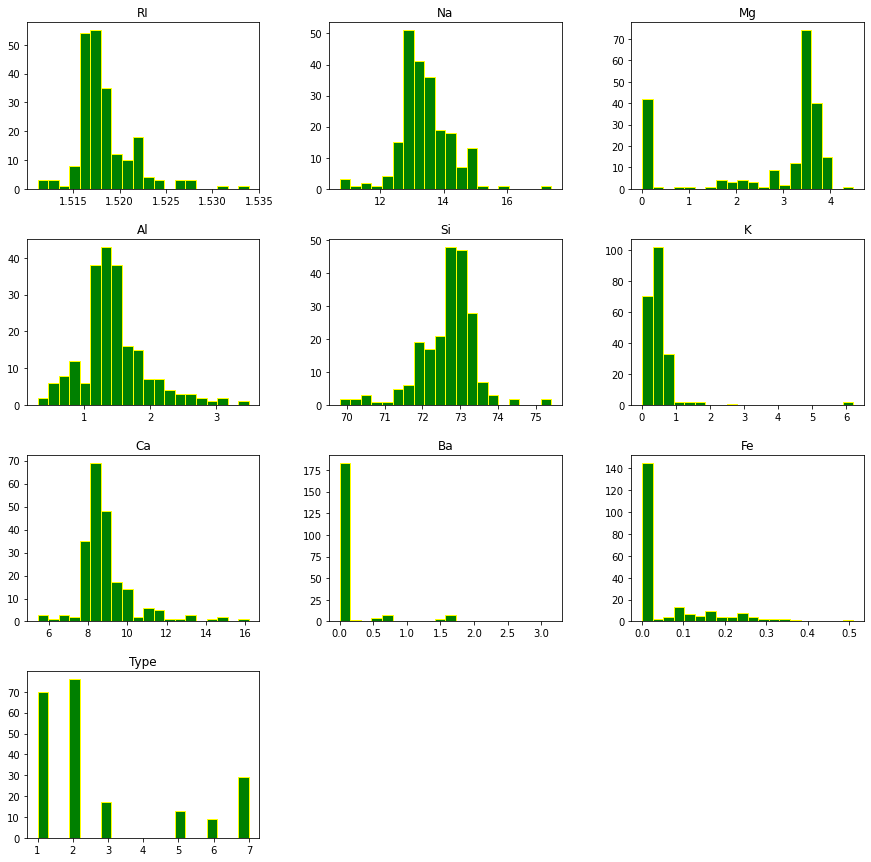

In [42]:
data.hist(bins=20, edgecolor="yellow", figsize=(15,15), color="green", grid=False)

In [9]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [10]:
data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


### Plot the correlation coefficient to see the relationship between the columns.

<Axes: >

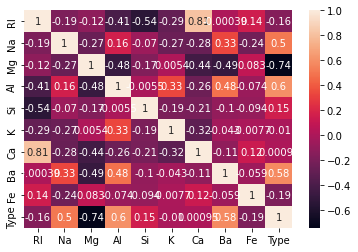

In [11]:
feature_corr = data.corr()
sns.heatmap(feature_corr, annot = True)

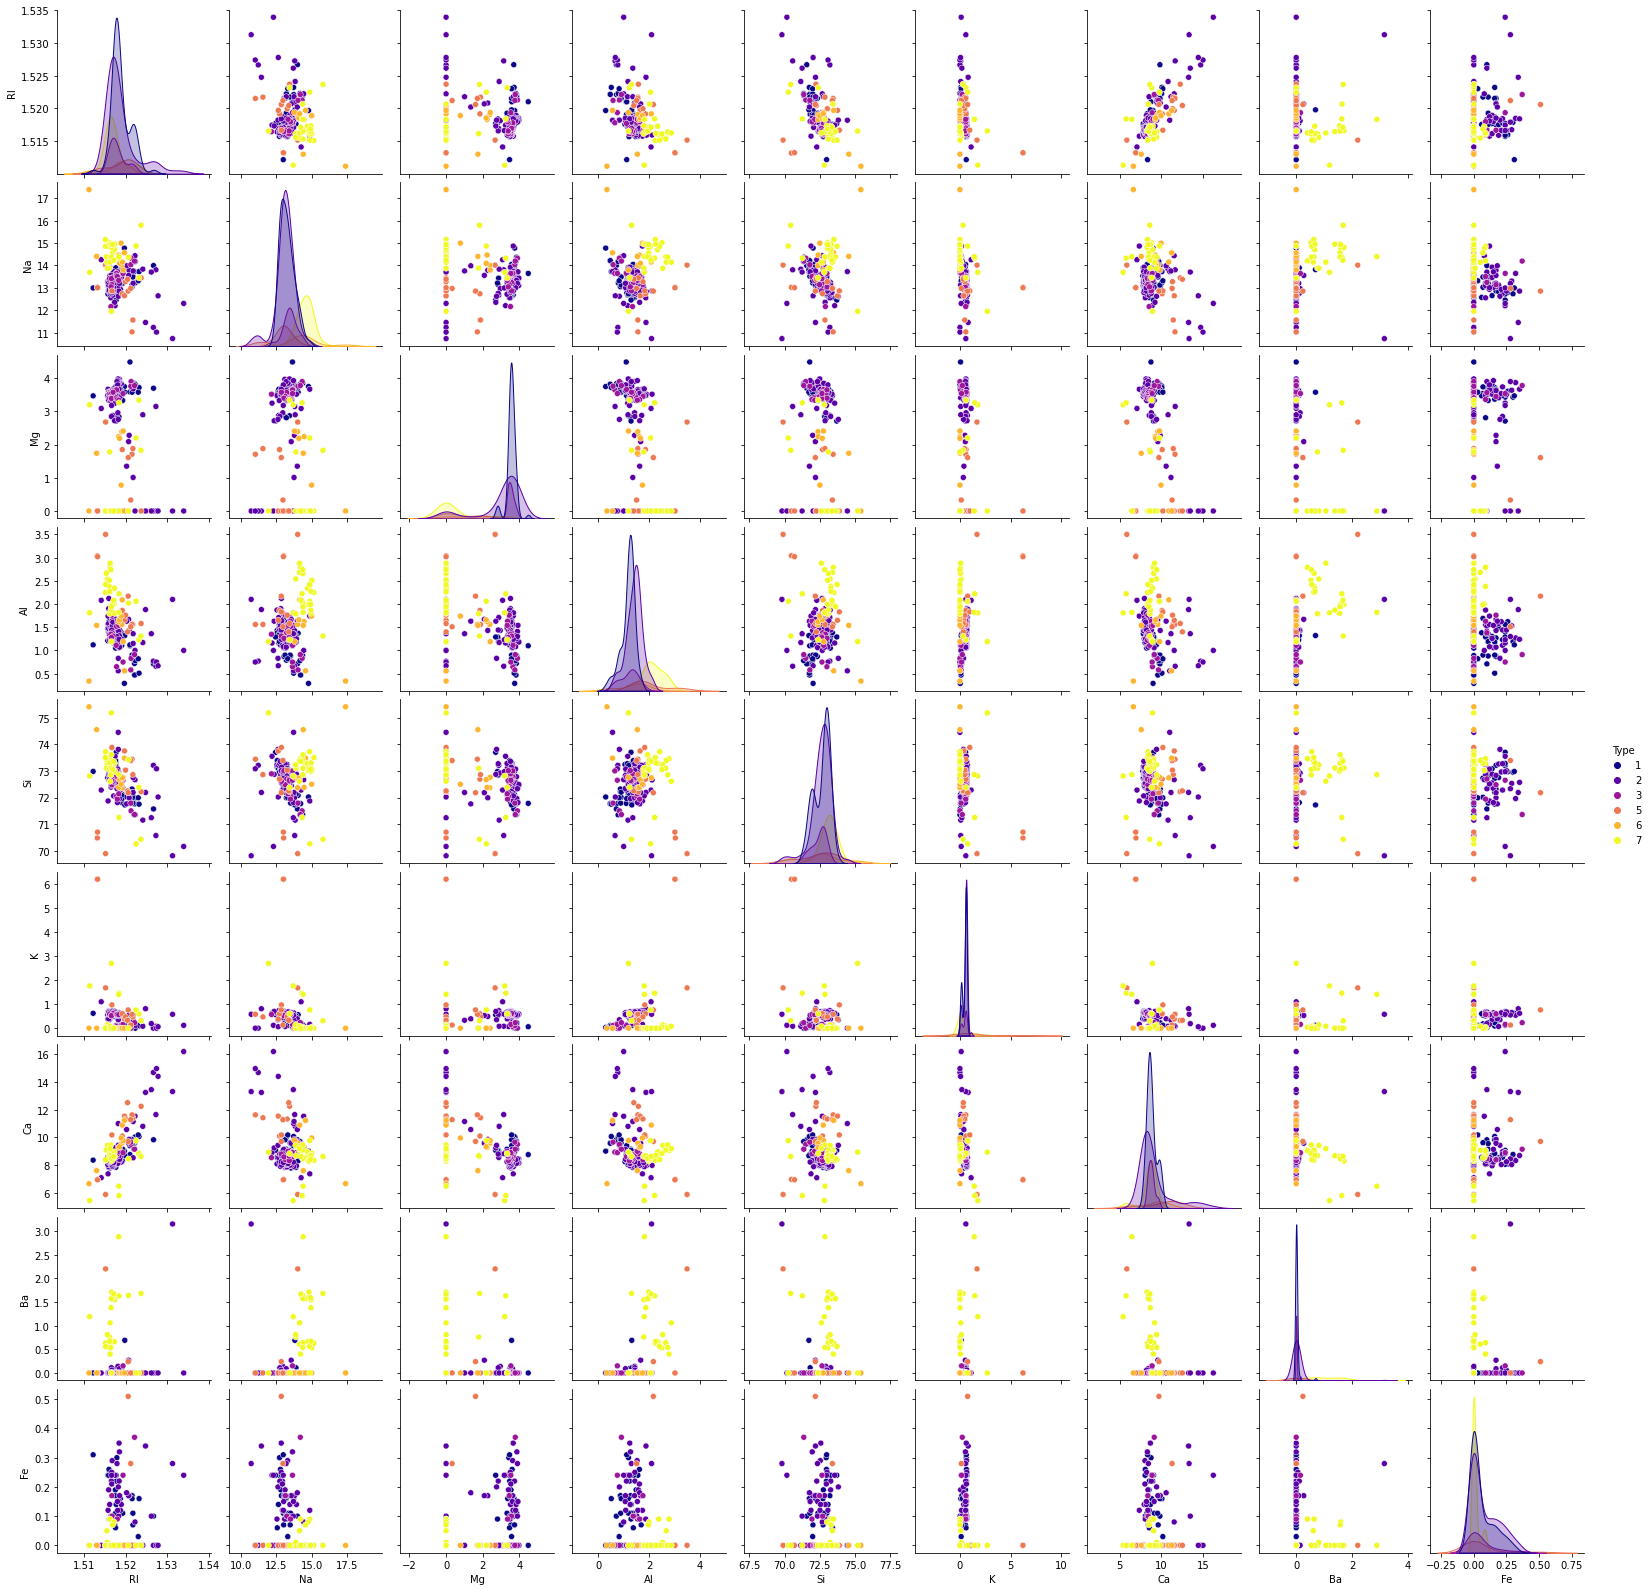

In [12]:
sns.pairplot(data, hue='Type',palette='plasma')

<Axes: ylabel='Count'>

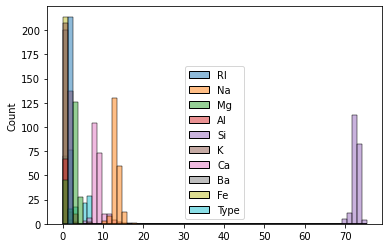

In [13]:
sns.histplot(data)

<Axes: ylabel='count'>

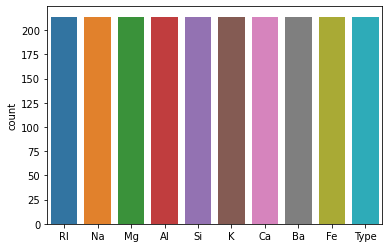

In [14]:
sns.countplot(data=data)

<Axes: xlabel='Type', ylabel='count'>

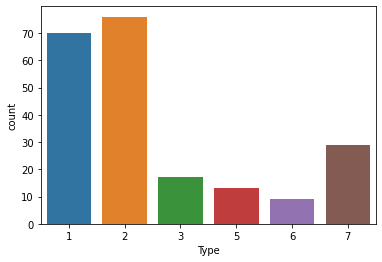

In [15]:
sns.countplot(x=data['Type'], data=data)

In [16]:
data.shape

(214, 10)

In [17]:
x = data.drop('Type', axis=1)
y = data['Type']

### Split the data

In [18]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size = 0.2, random_state= 42)

### Standardize the data.

Instantiate a scaler object.

In [19]:
scaler = StandardScaler()

We use fit_transform on train data but only transform the test data.

In [20]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Select a list of model you want to try in the stacking classifier. Here, we will try four models and also add a fifth model as the final estimator. The final estimator is usually a simple model, so we'll use logistic regression in this case.

Here, we stack the models, then we'll fit it on our data. We get the mean accuracy on the data and labels using the score property of the stacking classifier.

In [31]:
models = [
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]
stack_model = StackingClassifier(
 estimators=models, final_estimator=LogisticRegression()
)

stack_score = stack_model.fit(x_train, y_train).score(x_test, y_test)
print(f'Mean accuracy is {stack_score}')


Mean accuracy is 0.8372093023255814


We'd like to compare the accuracy of the stacked model to the accuracy of individual model.
Note that this is an experiment and stacking models does not always give better accuracy than any of the individual models. This is just t demonstrate the use of stacked classifier in scikit-learn.

We have a custom function here that we can run to evaluate our models. 

In [32]:
def evaluate_model(model, x, y):
    cv = StratifiedKFold(n_splits=5, random_state=None)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 

We have another function that will get all the models and then, we'll run a for loop to display the scores of each model.

In [22]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['dt'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['stacked'] = stack_model
    return models
    

In [41]:
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x, y)
    results.append(scores)
    names.append(name)
    print(f'{name} {mean(scores):.2f}')

lr 0.58
knn 0.61
dt 0.56
rf 0.72
stacked 0.61


In this example, the ramdom forest classifier gave a higher accuracy than the stacked model while k-nearest neighbor gave the same accuracy as the stacked model.

### Conclusion

In this article, we explored how to use the stacking classifier in scikit-learn which is a kind of ensemble method in machine learning. However, this method doesn't give a better accuracy in all scenarios. This is just fopr demonstration. The randomforest classifier gave a better accuracy in this particular example. However, it may work for your own use case, so it's good to know the different ways that machine learning algorithms are combined or selected to build models and the available possibilities.